<h1><center>
The Collatz Conjecture | A Numerical Analysis
</h1></center>

This notebook is an analysis on collatz numbers and hailstone numbers. Let us start by stating the Collatz Conjecture.

Define $\N = \{0, 1, 2, ...\}.$

Let $f:\mathb{Z}^{+}\to\Z^{+}$ be the function defined by:

$f(n) = \begin{cases}
\hspace{10pt} \frac{n}{2} \hspace{14pt} \text{ if } n \equiv 0\text{(mod 2)} \\
3n + 1 \hspace{2pt} \text{ if } n \equiv 1\text{(mod 2)}
\end{cases}
$

Furthermore, define the Collatz Sequence $C^{\ast}_{n}:\Z^{+}\to\Z^{+}$ for some seed $n$ containing terms generated by:

$a_{i} = \begin{cases}
\hspace{12pt} n \hspace{17pt}\text{ for } i = 0 \\
f(a_{i -1}) \hspace{4pt} \text{ for } i > 0
\end{cases}
$

Then, $\forall n \in \Z^{+} , \hspace{4pt} \exists i \in \N \text{ such that } a_{i} = 1$.


This notebook is not an attempt to prove this conjecture. Instead it is an exploration of the sequences using some popular python libraries.

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('Solarize_Light2')

In [72]:
def collatz(n):
    '''
    This takes a positive integer and halves it if its even and triples it then adds
    1 if odd. Then appends a list containing each iteration until n = 1 (inclusive).

    Parameters:
        n (int): a positive integer
    Returns:
        list: the Collatz Sequence generated from the seed n with the last element
        being 1.
    
    '''
    # Innitialize the list (Collatz Sequence of n) with n being the first element.
    col_seq = [n]

    # Until n == 1, recursively half n then append to the list if n is even, triple it
    # and add 1 if n is odd.
    while n > 1:
        if n % 2 == 0:
            n /= 2
        else:
            n = 3*n + 1
        col_seq.append(n)
    # Cast each element of the list as an int.
    col_seq = [int(n) for n in col_seq]
    return col_seq

Okay, let us see what sequence is generated from the seed $x = 12$.

In [73]:
C_12 = collatz(12)
C_12

[12, 6, 3, 10, 5, 16, 8, 4, 2, 1]

Let's now plot this data with the horizontal axis being number of iterations $i$ and the vertical axis being $a_{i}$ at that given iteration.

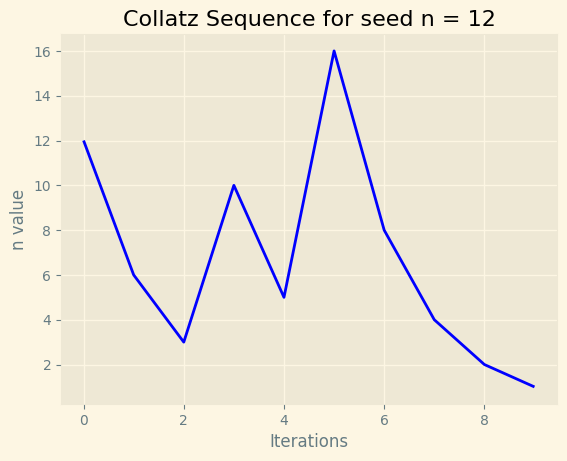

In [74]:
iterations = [n for n in range(len(C_12))]

plt.plot(iterations, C_12, 'b')

plt.title('Collatz Sequence for seed n = 12')
plt.xlabel('Iterations')
plt.ylabel('n value')

plt.show()

Interesting. Now, lets create a histogram comparing seed value to sequence length.

Lets grab all the Collatz Sequences $C^{\ast}_{k}$, for $k = \{1, 2, 3... , 250\}$ 

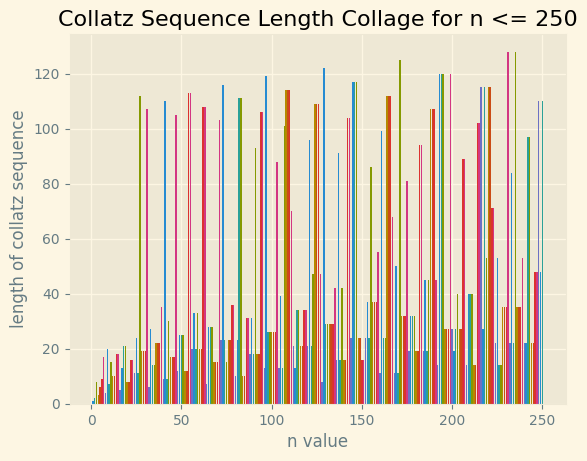

In [75]:
for n_val in range(1,251):
    plt.bar(n_val,len(collatz(n_val)), width=0.8, bottom=None, align='center', data=None)

plt.title('Collatz Sequence Length Collage for n <= 250')
plt.xlabel('n value')
plt.ylabel('length of collatz sequence')

plt.show()

So, from this diagram, we cannot definitively extract any meaningful information. Let's shift our analysis...

Let's compare the seed value to the largest element in its corrosponding sequence.

In [76]:
def largestCollatzElement(n):
    '''
    Parameters:
        n (int): a positive integer
    Returns:
        largest_val (int): the largest element in n's Collatz Sequence
    '''
    # Initialize the largest value as n and allow for the current value to be updated at the
    # beginning of each loop.
    largest_val = n
    while n > 1:
        current_val = n
        # n will surely be smaller if halved, so no need to chech if we have a bigger value.
        # Though, we will need to check if n is bigger after being tripled then increased
        # by one.
        if n % 2 == 0:
            n /= 2
        else:
            n = 3*n + 1
            if current_val > largest_val:
                largest_val = current_val
    return int(largest_val)

Text(0, 0.5, 'largest element in collatz sequence')

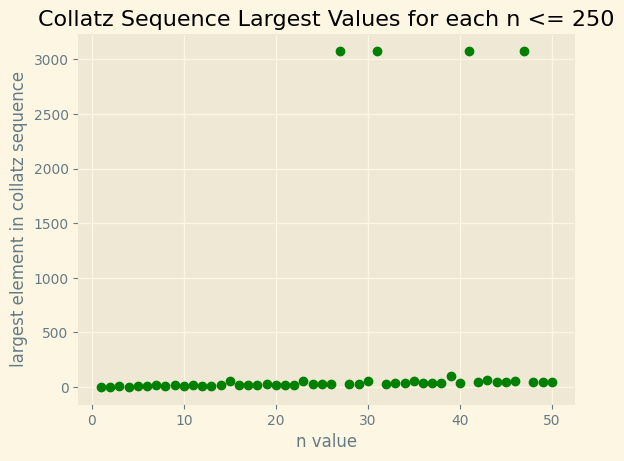

In [77]:
# Construct two lists, the first containing the input values and the second containing
# the output values.
x_vals = [i for i in range(1, 51)]
y_vals = [largestCollatzElement(i) for i in x_vals]

plt.plot(x_vals, y_vals, 'og')

plt.title('Collatz Sequence Largest Values for each n <= 250')
plt.xlabel('n value')
plt.ylabel('largest element in collatz sequence')


It appears that there is a major jump from $n = 26$ to $n = 27$.

In [78]:
C_26 = largestCollatzElement(26)
C_27 = largestCollatzElement(27)

print(f'The largest value for n = 26 is {C_26}, and')
print(f'the largest value for n = 27 is {C_27}.')

The largest value for n = 26 is 26, and
the largest value for n = 27 is 3077.
